En este notebook se presenta la resolución de la Guía $4$ de la materia Introducción a Redes Complejas en Biología de Sistemas. Los enunciados se pueden revisar [aquí](http://http://materias.df.uba.ar/scytda2020c1/files/2020/04/G04_Comunidades.pdf). 
Las integrantes del grupo 13 somos:
* Carolina Fritz
* Luna Kadysz
* Melisa Vinograd

# Ejercicio 1 - La comunidad del anillo:
<!---
1)Considere una red udimimensional de N nodos que forma un círculo. Cada nodo está conectado a sus dos vecinos. Particione el grafo en $N_c$ grupos de tamaño $N/N_c$ 

a)Calcule la modularidad de la partición obtenida

b)Cuál es el tamaño de comunidades que maximiza la modularidad?
-->

Considerando una red unidimensional de N nodos que forman un círculo, donde cada nodo esta conectado a sus dos vecinos vamos a particionar el grafo en $N_c$ grupos de tamaño $N/N_c$

## a) 
Vamos a calcular la modularidad de la particion obtenida de la siguiente manera:

$$Q= \frac{1}{2m} \sum_{ij} \left ( A_{ij} - \frac{k_ik_j}{2m}\right ) \delta (c_i,c_j) $$

Donde Q representa en cierta manera una medida de cuan buena es la separacion en comunidades de una dada red. El término $\sum_{ij}  \frac {A_{ij}}{2m}  \delta (c_i,c_j)$ representa la fraccion de enlaces de la misma comunidad y el otro termino representa la fraccion de enlaces del mismo tipo esperados por azar. Haciendo algunas operaciones con deltas se puede llegar a la siguiente igualdad:

$$Q=  \sum_{r}\left (e_{rr} - a_{r}^2 \right )$$

Donde $e_{rr}$ representa la fraccion de enlaces del tipo r-r y $a_{r}^2$ representa la fracción de puntas del tipo r.

Veamos estos parametros visualmente con un ejemplo sencillo: $N= 9$, $N_c=3$

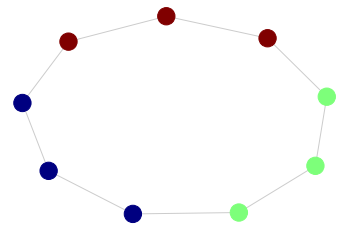

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import count
N=9
Nc=3
G = nx.cycle_graph(N)
for nodo in G.nodes():
    comunidad=nodo//Nc
    G.nodes[nodo]['comunidad']=comunidad

comunidades = set(nx.get_node_attributes(G,'comunidad').values())    
mapping = dict(zip(sorted(comunidades),count()))
nodes = G.nodes()

colors = [mapping[G.nodes[n]['comunidad']] for n in nodes]

pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G,pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=300, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

Usando este ejemplo es simple ver que se dan las siguientes relaciones para las redes ciclicas:
* $Nenlaces= N$

* $e_{rr} = \frac{N_c -1}{  Nenlaces} = \frac{N_c -1}{  N} $ : fracción de enlaces r-r

* $a_r = \frac{2 N_c}{  Nenlaces \cdot 2} = \frac{N_c}{N}$ : fracción de puntas r

* $\#r =\frac{N}{N_c} $ : cantidad de comunidades

Entonces para este tipo de redes y comunidades:
$$Q=  \sum_{r}\left (e_{rr} - a_{r}^2 \right ) =  \sum_{r} \left ( \frac{N_c -1}{  N} -  \left (\frac{N_c}{N}\right )^2 \right )$$

Como todos los terminos de la sumatoria se mantienen constantes porque todas las comunidades $r$ son equivalentes, entonces:

$$ Q=\frac{N}{N_c} \cdot \left ( \frac{N_c -1}{  N} -  \left (\frac{N_c}{N}\right )^2 \right )= \frac{N_c -1}{N_c} -\frac{N_c}{N}$$


Está claro que en todas estas cuentas se asume que N es _divisible_ por Nc.

Para el ejemplo de $N=9, N_c=3$ se obtiene:
$$Q\left (N=9, N_c=3\right )=  3 \cdot \left ( \frac{3 -1}{  9} -  \left (\frac{3}{9}\right )^2 \right ) = \frac{1}{3}$$

## b) 
El tamaño de comunidades que maximiza la modularidad se obtiene derivando $Q$ en funcion de la proporcion $N/N_c$ e igualando a 0.

$$\frac{\partial Q}{\partial \left ( N/N_c\right)} = 0$$

Para eso reescribimos $Q(N, N_c)$como $Q(N,x)$ donde $x=N/Nc$:

$$Q(N,x)= 1 - \left( \frac{x}{N}+ \frac{1}{x} \right)$$

$$\frac{\partial Q}{\partial x} = \frac{\partial}{\partial x}  \left(1 - \left( \frac{x}{N}+ \frac{1}{x} \right)\right)= \frac{1}{x^2}-\frac{1}{N}$$

Igualando a cero la ecuacion obtenemos

$$N=x^2 = \left ( \frac{N}{N_c}\right)^2$$

Con lo cual la modularidad máxima se alcanza cuando $N_c = \sqrt{N}$, es decir que en la situacion de modularidad máxima se tienen $N_c$ comunidades de tamaño $N_c$.

# Ejercicio 2 - Límite de resolución
2)Considere  una  red  conformada  por  un  anillo  de n$_c$ M-cliques,  cada  uno  de m nodos  y m(m-1)/2 enlaces. Cliques vecinos están conectados mediante un único enlace. Esta red tiene una estructura de comunidades natural, donde cada cluster se corresponde con un clique.

a)Determine la modularidad $M_{single}$ de esta partición natural de la red

b)Determine  la  modularidad $M_{pair}$ de  una  partición  en  la  que  pares  consecutivos  de  cliques  se juntan en un único cluster (ver figura)

c)Muestre  que  sólo  si $n_c<2L$ el  criterio  de  máxima  modularidad  predice  la  partición  intuitiva, donde

$$L = \frac{n_c m (m-1)}{2} + n_c$$

![ej2](img/Guia_4_ej_2.png)

video min 21:56 https://fbmcfcenubaar-my.sharepoint.com/personal/fsevlever_fbmc_fcen_uba_ar/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Ffsevlever%5Ffbmc%5Ffcen%5Fuba%5Far%2FDocuments%2FClases%20Redes%2FG04%2Emp4&parent=%2Fpersonal%2Ffsevlever%5Ffbmc%5Ffcen%5Fuba%5Far%2FDocuments%2FClases%20Redes&originalPath=aHR0cHM6Ly9mYm1jZmNlbnViYWFyLW15LnNoYXJlcG9pbnQuY29tLzp2Oi9nL3BlcnNvbmFsL2ZzZXZsZXZlcl9mYm1jX2ZjZW5fdWJhX2FyL0VWdXZoejhkenpORWswYUdlUnJIWFRnQlZkT25sWGtDLXFvMVFKNnBYQURjcEE_cnRpbWU9eWJNbGNjc0YyRWc

Considerando una red conformada por un anillo de $n_c$ M-cliques, donde cada uno tiene _m_ nodos y _m(m-1)/2_ enlaces y cliques vecinos estan conectados mediante un único enlace. Esta red tiene una estructura de comunidades natural, donde cada cluster es un clique. 

## a) 
La modularidad $M_{single}$ de la particion natural de la red es la siguiente:

* $M_{single}=  \sum_{r}\left (e_{rr} - a_{r}^2 \right )$ 

* $e_{rr}=\frac{ m (m-1) / 2 }{n_c \cdot  \left(m (m-1) / 2 + 1 \right)} =$ : fracción de enlaces r-r

* $a_r = \frac{ m (m-1) + 2 }{n_c \cdot \left( m (m-1) + 2\right)} = \frac{1}{n_c} $ : fracción de puntas r

* $\sum_{r} 1 = n_c$

Como $e_{rr}$ y $a_r$ no dependen de r, obtenemos:
$$M_{single}= n_c \cdot \left ( \frac{ m (m-1) / 2 }{n_c \cdot  \left(m (m-1) / 2 + 1 \right)} -  \left(\frac{1}{n_c}\right)^2\right)=\left ( \frac{ m (m-1) / 2 }{\left(m (m-1) / 2 + 1 \right)} -  \frac{1}{n_c}\right)$$


# b)
![ej2](img/Guia_4_ej_2.png)

La modularidad $M_{pair}$ de una particion en la que pares consecutivos de cliques se juntan en un único cluster se calcula de la siguiente manera:



* $M_{pair}=  \sum_{r}\left (e_{rr} - a_{r}^2 \right )$ 

* $e_{rr}=\frac{ m (m-1) / 2\mathbf{ \cdot 2  + 1}}{n_c \cdot  \left(m (m-1) / 2  + 1 \right)} =$ : fracción de enlaces r-r

* $a_r = \frac{ \left(m (m-1) + 2 \right) \mathbf{\cdot 2}}{n_c \cdot \left( m (m-1) + 2\right)} = \frac{\mathbf{2}}{n_c} $ : fracción de puntas r

* $\sum_{r} 1 = \frac{n_c}{2}$

En __negrita__ estan marcados los términos que se agregan respecto de $ M_{single}$

Como $e_{rr}$ y $a_r$ no dependen de r, obtenemos:
$$M_{pair}=  \frac{n_c}{2} \cdot  \left ( \frac{ m (m-1)+1 }{n_c \cdot  \left(m (m-1) / 2 + 1 \right)} -  \left(\frac{2}{n_c}\right)^2\right)=\left ( \frac{ m (m-1) +1 }{\left(m (m-1) + 2 \right)} -  \frac{2}{n_c}\right)$$

## c)

Tomando la nocion intuitiva de que separar un clique no podria incrementar la modularidad, entonces la modularidad máxima se tiene que alcanzar juntando de a K cliques.

Una condicion excluyente para que la particion intuitiva sea la de máxima modularidad, es que $M_{single} > M_{pair}$. Entonces primero vamos a buscar la condicion para que eso se cumpla:

Reescribimos ambas modularidades en funcion de $L = \frac{n_c m (m-1)}{2} + n_c$:

* $M_{single} = \left [ \frac{\frac{L}{n_c}-1}{L} -\left (\frac{1}{n_c}  \right )^2\right ] n_c$

* $M_{pair} =\left [ \frac{\left (\frac{L}{n_c}-1  \right )2+1}{L} -\left (\frac{2}{n_c}  \right )^2\right ] \frac{n_c}{2} $



$$\left [ \frac{\frac{L}{n_c}-1}{L} -\left (\frac{1}{n_c}  \right )^2\right ] n_c > \left [ \frac{\left (\frac{L}{n_c}-1  \right )2+1}{L} -\left (\frac{2}{n_c}  \right )^2\right ] \frac{n_c}{2}  $$

$$\frac{1}{n_c} - \frac{1}{L} - \frac{1}{{n_c}^2} > \frac{1}{n_c} - \frac{1}{L} + \frac{1}{2L} - \frac{2}{{n_c}^2}$$

$$  \frac{1}{{n_c}^2} >\frac{1}{2L} $$

Con lo cual, que la condicion $ {{n_c}^2} <{2L} $ se cumpla, equivale a que $M_{single} > M_{pair}$, es decir que $M_{single}$ corresponda al criterio de máxima modularidad.

NO SE COMO MOSTRAR QUE NO NO ES UN MAXIMO LOCAL
